In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.0 MB 4.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.0 MB 4.2 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.0 MB 4.3 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.0 MB 4.5 MB/s eta 0:00:02
   -------------------- ------------------- 5.5/11.0 MB 4.2 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.0 MB 4.4 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.0 MB 4.2 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 4.1 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 4.0 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.0 MB 3.8 MB/s eta 0:00:01
   ----------------

In [4]:
#Car Price Prediction Model using Linear Regression

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Matplotlib is building the font cache; this may take a moment.


In [7]:
# Step 2: Load the dataset
df = pd.read_csv("car_price_prediction.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
# Step 3: Initial Exploration

df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

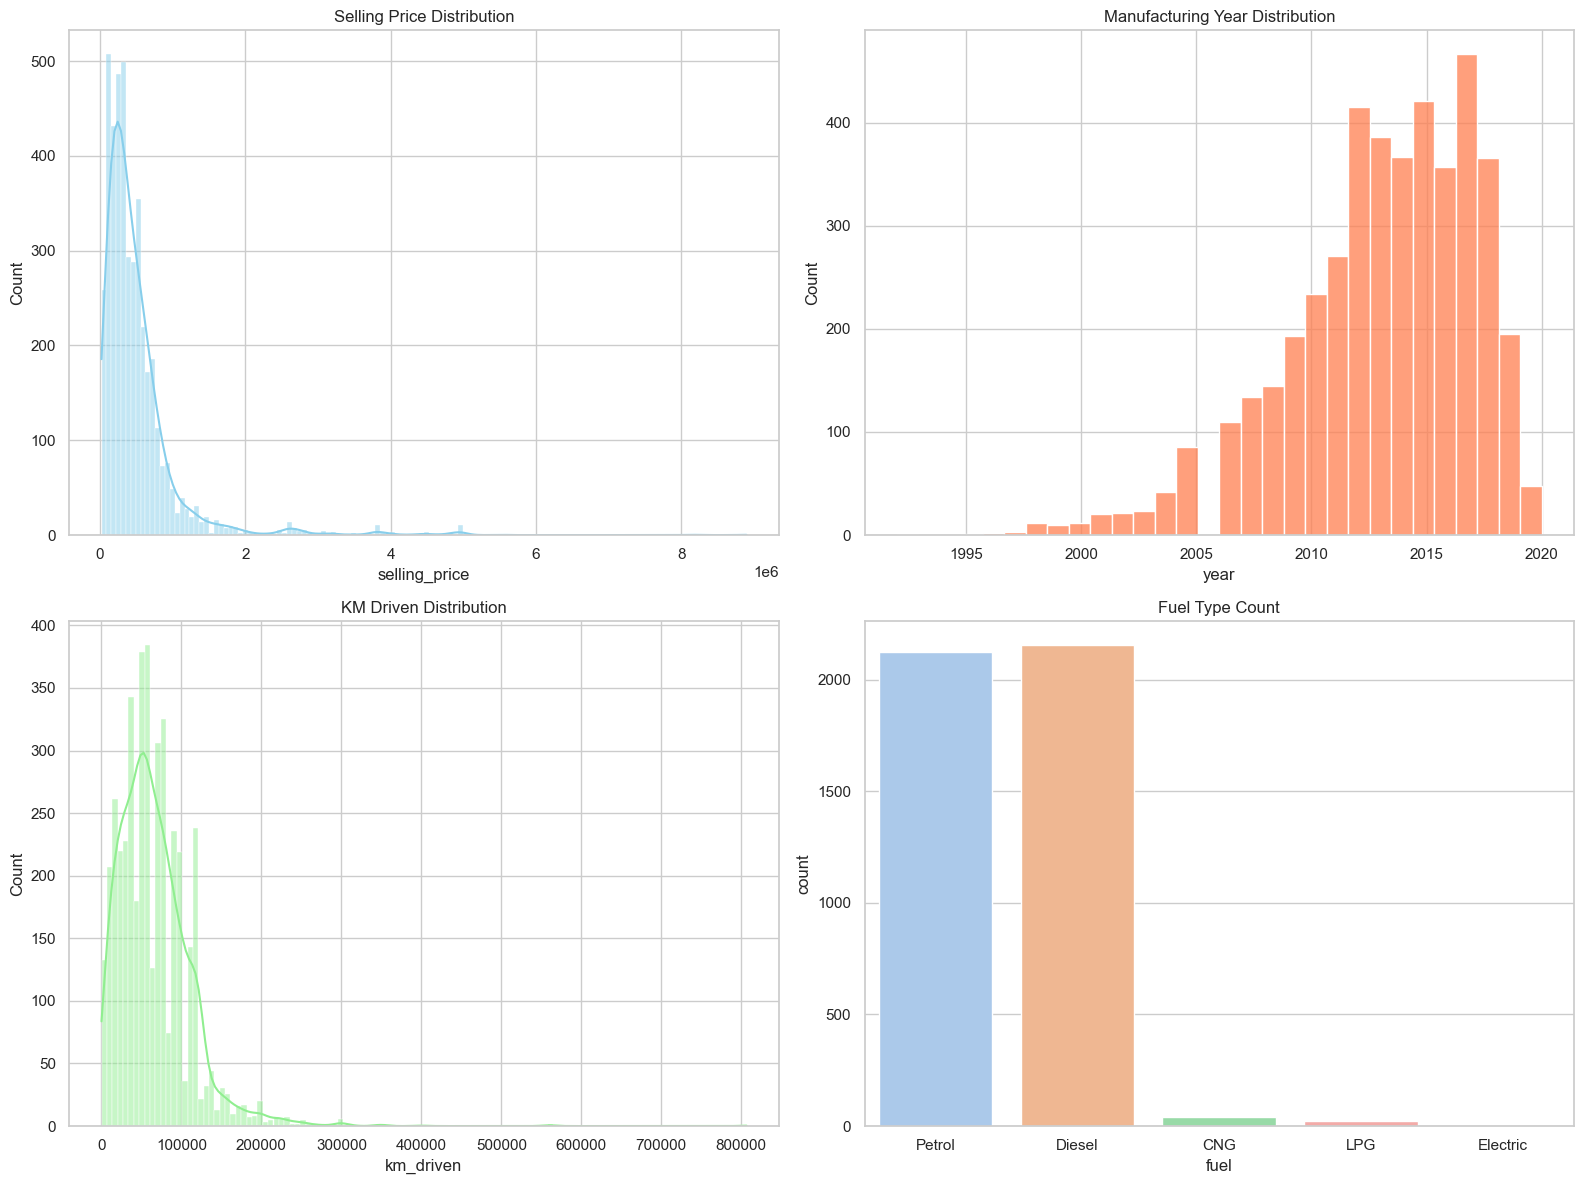

In [10]:
# Step 4: Visual Exploratory Data Analysis (EDA)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.histplot(df['selling_price'], kde=True, color='skyblue')
plt.title('Selling Price Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['year'], bins=30, color='coral')
plt.title('Manufacturing Year Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['km_driven'], kde=True, color='lightgreen')
plt.title('KM Driven Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='fuel', data=df, hue='fuel', palette='pastel', legend=False)
plt.title('Fuel Type Count')

plt.tight_layout()
plt.show()

In [13]:
# Step 5: Data Preprocessing

# Drop 'name' column only if it exists
if 'name' in df.columns:
    df.drop(columns=['name'], inplace=True)

# Encode categorical columns
label_cols = ['fuel', 'seller_type', 'transmission', 'owner']
df = pd.get_dummies(df, columns=label_cols, drop_first=True)

# Check the cleaned dataframe
df.head()

,year,selling_price,km_driven,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_1,seller_type_2,transmission_1,owner_1,owner_2,owner_3,owner_4
0,-1.445074,60000,0.081139,False,False,False,True,True,False,True,False,False,False,False
1,-1.445074,135000,-0.347689,False,False,False,True,True,False,True,False,False,False,False
2,-0.258795,600000,0.724381,True,False,False,False,True,False,True,False,False,False,False
3,0.927485,250000,-0.433455,False,False,False,True,True,False,True,False,False,False,False
4,0.215717,450000,1.603479,True,False,False,False,True,False,True,False,True,False,False


In [15]:
# Step 6: Train-Test Split

# Print the shape of training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3472, 13)
X_test shape: (868, 13)
y_train shape: (3472,)
y_test shape: (868,)


In [19]:
# Step 7: Train Linear Regression Model

# Show first 5 predicted selling prices
print("Predicted prices:\n", y_pred[:5])

# Show first 5 actual selling prices
print("\nActual prices:\n", y_test.values[:5])

Predicted prices:
 [ 429791.44395393  504490.85855368   60211.1711833   475380.44208611
 1519809.14934826]

Actual prices:
 [165000 250000 120000 450000 730000]


In [20]:
# Step 8: Evaluate the Model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation Metrics:
MAE: 221706.37
MSE: 182146878750.28
RMSE: 426786.69
R² Score: 0.40


In [21]:
# Step 9

pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

fuel_1            279850.784859
seller_type_2     169804.231596
year              150742.055156
owner_3           130679.819988
fuel_3             53484.366182
owner_1              613.220830
fuel_4            -20697.354665
owner_4           -27064.751807
owner_2           -36045.713660
km_driven         -46962.184595
seller_type_1     -69819.267902
fuel_2           -640119.339506
transmission_1   -891338.058520
dtype: float64

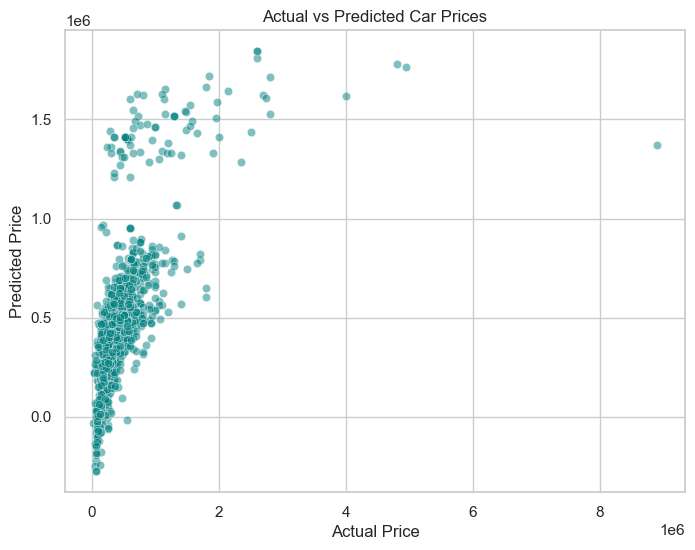

In [22]:
# Step 10:  Plot Actual vs Predicted

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()

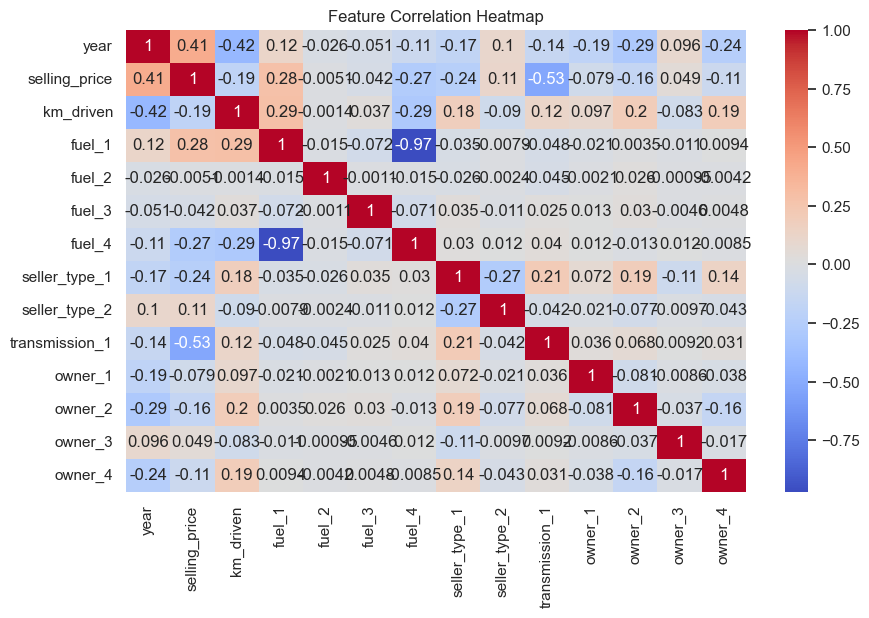

In [25]:
# Visualize correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

from sklearn.metrics import r2_score
print("Random Forest R2 Score:", r2_score(y_test, rf_pred))

Random Forest R2 Score: 0.4976778239505151
